<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


*   Extract information from a given web site
*   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br>


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup as bs
import requests

Download the webpage at the url


In [3]:
#your code goes here
data = requests.get(url).text

Create a soup object


In [4]:
#your code goes here
soup = bs(data,"html5lib")

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
table = soup.find("table")
popular_language = []

for row in table.find_all('tr'):
    cols = row.find_all('td')
    language = cols[1].getText()
    salary = cols[3].getText()
    print(("{} : {}").format(language,salary))
    
    popular_lang = [language,salary]
    popular_language.append(popular_lang)
    
print(popular_language)

Language : Average Annual Salary
Python : $114,383
Java : $101,013
R : $92,037
Javascript : $110,981
Swift : $130,801
C++ : $113,865
C# : $88,726
PHP : $84,727
SQL : $84,793
Go : $94,082
[['Language', 'Average Annual Salary'], ['Python', '$114,383'], ['Java', '$101,013'], ['R', '$92,037'], ['Javascript', '$110,981'], ['Swift', '$130,801'], ['C++', '$113,865'], ['C#', '$88,726'], ['PHP', '$84,727'], ['SQL', '$84,793'], ['Go', '$94,082']]


Save the scrapped data into a file named *popular-languages.csv*


In [6]:
# your code goes here
import csv
with open('popular-languages.csv','w',newline='') as file:
    csvwriter = csv.writer(file)
    for row in popular_language:
        csvwriter.writerow(row)   

Present that data using a bar chart here. Order the bar chart in the descending order of salary.

<ipython-input-8-96715abaaa3a>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Average Annual Salary'] = df['Average Annual Salary'].str.replace('$', '')


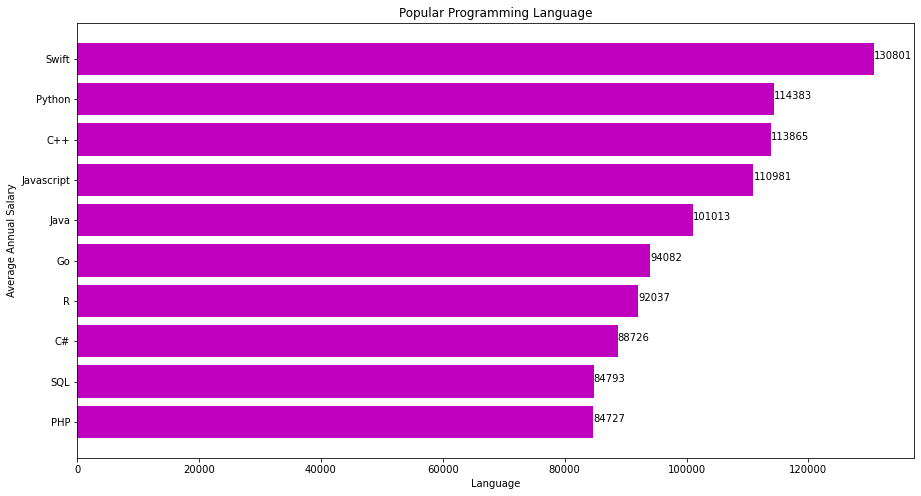

In [8]:
import pandas as pd
df = pd.read_csv('popular-languages.csv')
#removing $ and , signs in column Average Annual Salary
df['Average Annual Salary'] = df['Average Annual Salary'].str.replace(',', '')
df['Average Annual Salary'] = df['Average Annual Salary'].str.replace('$', '')
#converting column to int values
df['Average Annual Salary'] = df['Average Annual Salary'].astype(int)
#sorting in descending order of salary
sdf = df.sort_values(by='Average Annual Salary',ascending=True)

#plotting the bar chart 
import matplotlib.pyplot as plt

#Assigning x and y values
lang = sdf['Language']
sal = sdf['Average Annual Salary']

# setting figure size by using figure() function 
plt.figure(figsize = (15, 8))

# Plot horizontal bar chart
bars = plt.barh(lang,sal, color= 'm')

# To get data labels
for  bar in bars:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
    
# Define axes labels
plt.xlabel('Language')
plt.ylabel('Average Annual Salary')

# giving title to the plot
plt.title('Popular Programming Language')

# Display a bar chart    
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01).
